In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import PIL
from io import BytesIO
from IPython.display import clear_output, Image as NoteImage, display
# from pycaret.regression import setup, compare_models,evaluate_model ,  predict_model,  save_model, load_model

In [2]:
pip install pycaret[full]

  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached plotly-5.11.0-py2.py3-none-any.whl (15.3 MB)
  Using cached lightgbm-3.3.3-py3-none-manylinux1_x86_64.whl (2.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 575.7 kB/s eta 0:00:00MB/s eta 0:00:01:01
  Preparing metadata (setup.py) ... done
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached cufflinks-0.17.3.tar.gz (81 kB)
  Preparing metadata (setup.py) ... done
  Using cached wordcloud-1.8.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (458 kB)
  Using cached numba-0.51.2.tar.gz (2.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached pandas_profiling-3.5.0-py2.py3-none-any.whl (325 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

In [6]:
%matplotlib notebook
def imshow(im,fmt='jpeg'):
    #a = np.uint8(np.clip(im, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(im).save(f, fmt)
    display(NoteImage(data=f.getvalue()))
def imread(filename):
    img = cv.imread(filename)

    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

In [7]:
data=pd.read_csv("Fall 2019 Plumes detected by AVIRIS-NG and GAO provided by NASA-JPL and U.Arizona.csv")
data

,source_id,plume_lat,plume_lon,plume_candidate_id,date_of_detection,time_of_detection,source_type,source_type_label,ipcc,qplume,sigma_qplume,active_flare,inactive_flare,Operator_Alias,imageurl
0,P00156,32.283447,-103.741815,ang20190922t192642-A,9/23/2019,7:26:42 PM,compressor,Midstream,1B2 Oil & Natural Gas,296.676732,98.755811,False,False,DCP MIDSTREAM PARTNERS,https://edf-permian-data.s3.amazonaws.com/imag...
1,P00119,32.244361,-103.711379,ang20190922t192642-B,9/23/2019,7:26:42 PM,tank,Production,1B2 Oil & Natural Gas,640.968143,190.138173,False,False,DEVON ENERGY PRODUCTION CO,https://edf-permian-data.s3.amazonaws.com/imag...
2,P00475,32.166625,-103.685468,ang20190922t194340-A,9/23/2019,7:43:40 PM,tank,Production,1B2 Oil & Natural Gas,1091.242729,310.028504,False,False,DEVON ENERGY PRODUCTION CO,https://edf-permian-data.s3.amazonaws.com/imag...
3,P00002,32.200072,-103.673301,ang20190922t192642-4,9/23/2019,7:26:42 PM,tank,Production,1B2 Oil & Natural Gas,420.725207,147.155782,False,False,ENLINK,https://edf-permian-data.s3.amazonaws.com/imag...
4,P00003,32.116008,-103.626345,ang20190922t192642-5,9/23/2019,7:26:42 PM,tank,Production,1B2 Oil & Natural Gas,1051.909600,339.267587,False,False,EOG RESOURCES INC,https://edf-permian-data.s3.amazonaws.com/imag...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,P01769,31.478768,-102.958800,GAO20191103t163539p0000-C,11/4/2019,4:35:39 PM,compressor,Midstream,1B2 Oil & Natural Gas,159.291858,64.873698,False,False,UNKNOWN,https://edf-permian-data.s3.amazonaws.com/imag...
3063,P01784,32.793745,-104.123650,GAO20191103t181042p0000-A,11/4/2019,6:10:42 PM,pipeline,Midstream,1B2 Oil & Natural Gas,250.722494,51.888206,False,False,UNKNOWN,https://edf-permian-data.s3.amazonaws.com/imag...
3064,P01784,32.793674,-104.123290,GAO20191103t182306p0000-B,11/4/2019,6:23:06 PM,pipeline,Midstream,1B2 Oil & Natural Gas,298.184474,68.096895,False,False,UNKNOWN,https://edf-permian-data.s3.amazonaws.com/imag...
3065,P01786,32.795682,-104.163570,GAO20191103t182306p0000-C,11/4/2019,6:23:06 PM,pipeline,Midstream,1B2 Oil & Natural Gas,200.567906,36.274204,False,False,UNKNOWN,https://edf-permian-data.s3.amazonaws.com/imag...


In [8]:
def flare_extractor(img):
#     img=imread("ang20190922t192642-A.png")
    x,y,c=img.shape
    real_img=np.zeros((x,y,c))
    red=img[:,:,0]
    green=img[:,:,1]
    blue=img[:,:,2]
    only_blue_carbon=np.uint8(blue>220)*np.uint8(green<120)*np.uint8(red<120)
    only_blue_carbon_sum=np.sum(only_blue_carbon)
#     imshow(only_blue_carbon)
    only_green_carbon=np.uint8(blue<150)*np.uint8(green>150)*np.uint8(red<150)
#     imshow(only_green_carbon)
    only_green_carbon_sum=np.sum(only_green_carbon)
    only_red_carbon=np.uint8(blue<120)*np.uint8(green<120)*np.uint8(red>220)
    only_red_carbon_sum=np.sum(only_red_carbon)
    only_yellow_carbon=np.uint8(blue<120)*np.uint8(green>220)*np.uint8(red>220)*255

#     imshow(only_red_carbon)
    real_img[:,:,0]=only_red_carbon*255
    real_img[:,:,1]=only_green_carbon*255
    real_img[:,:,2]=only_blue_carbon*255
    # real_img[:,:,0]=only_red_carbon+only_yellow_carbon
    # real_img[:,:,0]=only_green_carbon+only_yellow_carbon
    out=np.uint8(real_img)
    # imshow(out)
    # print(out)
    return out,only_red_carbon_sum, only_green_carbon_sum, only_blue_carbon_sum

In [9]:
# df=pd.DataFrame(data,columns=["source_type","qplume"])

In [10]:
# df["red"]=data.apply(lambda row: imread("images/"+row["source_type"]+"-"+row.index+".png"))

In [11]:
data["img"]=1
data["red"]=1
data["green"]=1
data["blue"]=1
data["img"]=data["img"].astype(object)
data["source_type"]=data["source_type"].astype(str)

In [12]:
# data["img"]=data["source_type"].apply(lambda row: imread("images/"+row+"-"+row.name+".png"))
for i in range(len(data)):
    try:
        img=imread("images/"+data["source_type"][i]+"-"+str(i)+".png")
        # imshow(img)

        img,r,g,b=flare_extractor(img)
        
        # data["img"][i]=img
        data["red"][i]=r
        data["green"][i]=g
        data["blue"][i]=b
        # data["img"][i]=img
    except:
        print("error at "+str(i))
        pass
   
# img=imread(data["source_type"][0]+"-"+str(0)+".png")

/tmp/ipykernel_25218/1673766076.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["red"][i]=r
/tmp/ipykernel_25218/1673766076.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["green"][i]=g
/tmp/ipykernel_25218/1673766076.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["blue"][i]=b
[ WARN:0@11.646] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('images/compressor-1080.png'): can

error at 1080


In [13]:
data.head()

,source_id,plume_lat,plume_lon,plume_candidate_id,date_of_detection,time_of_detection,source_type,source_type_label,ipcc,qplume,sigma_qplume,active_flare,inactive_flare,Operator_Alias,imageurl,img,red,green,blue
0,P00156,32.283447,-103.741815,ang20190922t192642-A,9/23/2019,7:26:42 PM,compressor,Midstream,1B2 Oil & Natural Gas,296.676732,98.755811,False,False,DCP MIDSTREAM PARTNERS,https://edf-permian-data.s3.amazonaws.com/imag...,1,0,12,155
1,P00119,32.244361,-103.711379,ang20190922t192642-B,9/23/2019,7:26:42 PM,tank,Production,1B2 Oil & Natural Gas,640.968143,190.138173,False,False,DEVON ENERGY PRODUCTION CO,https://edf-permian-data.s3.amazonaws.com/imag...,1,6,14,31
2,P00475,32.166625,-103.685468,ang20190922t194340-A,9/23/2019,7:43:40 PM,tank,Production,1B2 Oil & Natural Gas,1091.242729,310.028504,False,False,DEVON ENERGY PRODUCTION CO,https://edf-permian-data.s3.amazonaws.com/imag...,1,41,79,17
3,P00002,32.200072,-103.673301,ang20190922t192642-4,9/23/2019,7:26:42 PM,tank,Production,1B2 Oil & Natural Gas,420.725207,147.155782,False,False,ENLINK,https://edf-permian-data.s3.amazonaws.com/imag...,1,0,38,30
4,P00003,32.116008,-103.626345,ang20190922t192642-5,9/23/2019,7:26:42 PM,tank,Production,1B2 Oil & Natural Gas,1051.909600,339.267587,False,False,EOG RESOURCES INC,https://edf-permian-data.s3.amazonaws.com/imag...,1,82,50,89


In [14]:
df=data[["source_type","qplume","red","green","blue"]]
dummy=pd.get_dummies(df,columns=["source_type"],drop_first=True)
dummy.to_csv("dummy.csv",index=False)

In [ ]:
s=setup(dummy,target="qplume",train_size=0.8)

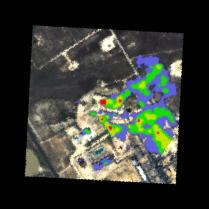

In [49]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv.INTER_LINEAR)
  return result
y=28
x=28
h=155
w=155  
imshow(rotate_image(img,30))

In [29]:
data["img"]=rotate_image(img,54)[y:y+h, x:x+w]

ValueError: Length of values (155) does not match length of index (3067)